In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('https://raw.githubusercontent.com/rromanss23/Machine_Leaning_Engineer_Udacity_NanoDegree/master/projects/boston_housing/housing.csv')
data

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


In [34]:
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
# Success
data.shape

(489, 4)

# data exploration


In [35]:
###In this first section of this project, I will make a cursory investigation about the Boston housing data and provide my observations.

##Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

In [36]:
np.amin(prices)

105000.0

In [37]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

In [38]:
# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


# feature observation

In [39]:
### As a reminder, we are using three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

###'RM' is the average number of rooms among homes in the neighborhood.
###'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
###'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood

# developing a model

In [40]:
### In this second section of the project, I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

In [41]:
## implementation: define a performance metrics


In [42]:
# Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
   # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

# implementation : shuffle and split data

In [43]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [50]:
pip install visualpython

Note: you may need to restart the kernel to use updated packages.


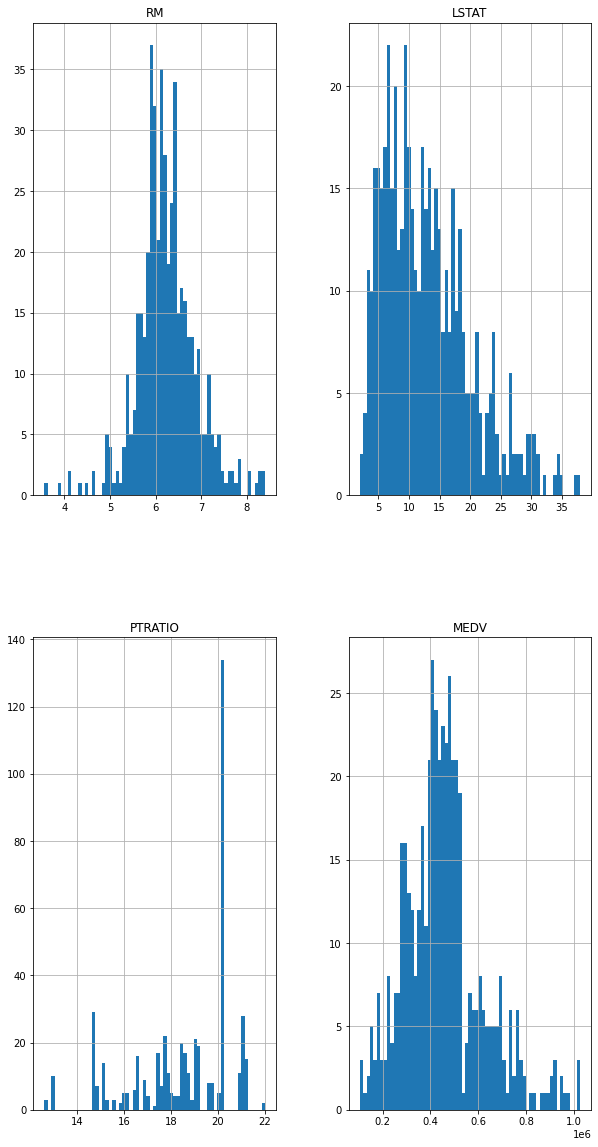

In [52]:
import seaborn as sns
_ = data.hist(bins=65, figsize=(10,20))

In [58]:
 pip install vpython 

Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.model_selection import learning_curve

# implementation:fitting a model

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# making prediction

In [85]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


# predicting selling price

In [86]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $403,025.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


In [87]:
import vpython as vp

In [92]:
pip install -U vpython

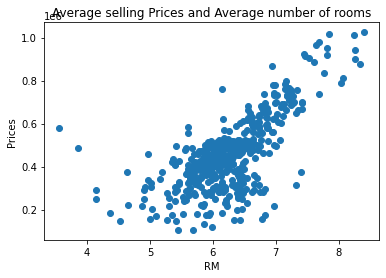

In [94]:
#                         RM VS PRICES
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.scatter(data['RM'], data['MEDV']) 
#Lables & Title
plt.title("Average selling Prices and Average number of rooms")
plt.xlabel("RM")
plt.ylabel("Prices")
plt.show()

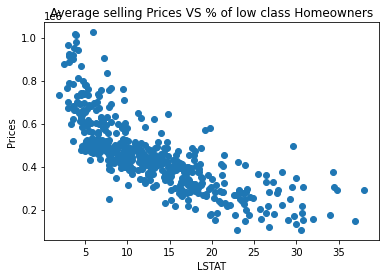

In [95]:
#                       LSTAT VS PRICES
fig=plt.figure()
ax=fig.add_subplot(1, 1, 1)
ax.scatter(data['LSTAT'], data['MEDV'])  
plt.title("Average selling Prices VS % of low class Homeowners")
plt.xlabel("LSTAT")
plt.ylabel("Prices")
plt.show()